In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
%matplotlib inline

In [2]:
df = pd.read_csv("kc_housing_data_cleaned_with_15_19_prices.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,date_key,Compounding,Discounting,price_dec_15,price_dec_19
0,5056500260,5/2/2014,440000.0,4,2.25,2160,8119,1.0,0.0,0.0,...,98006,47.5443,-122.177,1850,9000,2014-05-02,1.109072,0.901654,487991.86,598799.49
1,4040800810,5/2/2014,420000.0,3,2.25,2000,8030,1.0,0.0,0.0,...,98008,47.6188,-122.114,2070,8250,2014-05-02,1.109072,0.901654,465810.41,571581.33
2,7197300105,5/2/2014,550000.0,4,2.50,1940,10500,1.0,0.0,0.0,...,98052,47.6830,-122.114,2200,10500,2014-05-02,1.109072,0.901654,609989.82,748499.37
3,5100401414,5/2/2014,490000.0,2,1.00,880,6380,1.0,0.0,0.0,...,98115,47.6924,-122.322,1340,6380,2014-05-02,1.109072,0.901654,543445.48,666844.89
4,7525100520,5/2/2014,335000.0,2,2.00,1350,2560,1.0,0.0,0.0,...,98052,47.6344,-122.107,1790,2560,2014-05-02,1.109072,0.901654,371539.25,455904.16


### Seeing how many outliers exist in the data set for any given variable.

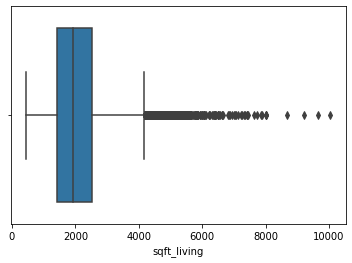

In [8]:
sns.boxplot(x = df['sqft_living'])
plt.show()

In [4]:
# calculate summary statistics
variable = 'sqft_living'
data_mean, data_std = mean(df[variable]), std(df[variable])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(upper)
# identify outliers
outliers = [x for x in df[variable] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df[variable] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

4839.493524661104
Identified outliers: 247
Non-outlier observations: 21173


### Making a copy of the original data frame.

In [5]:
df_original = df.copy()

### Removing rows in the data frame that contain outliers for the variable in question.

In [6]:
variable = 'bedrooms'
data_mean, data_std = mean(df[variable]), std(df[variable])
cut_off = data_std * 2

for i in range(len(df)):
    if df.loc[i,variable] < (data_mean - cut_off) or df.loc[i,variable] > (data_mean + cut_off):
        df.drop([i], inplace=True)
    else:
        continue

print(len(df))

20902


### Exporting as a new .csv file.

In [7]:
# df.to_csv('kc_housing_data_cleaned_outliers_removed.csv')